In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lyrical Data EDA

In [2]:
data = pd.read_json('/content/drive/MyDrive/annamayya_dataset_cleaned.json')

In [3]:
data

,Ragam,Samputi,author,genre,Lyric
0,సామంతం,1-1,అన్నమాచార్య,Devotional,వలచి పైకొనగరాదు వలదని తొలగరాదు కలికిమరుడు సేసి...
1,దేసాక్షి,1-2,అన్నమాచార్య,Devotional,వేదవేద్యులు వెదకేటిమందు అదినంత్యములేని ఆమందు అ...
2,దేసాక్షి,1-3,అన్నమాచార్య,Devotional,హీనదశలబొంది యిట్ల నుండుటకంటె నానావిధులను నున్న...
3,సామంతం,1-4,అన్నమాచార్య,Devotional,ఏవం శ్రుతిమత మిదమేవ తద్భావయితు మతఃపరం నాస్తి అ...
4,పాడి,1-5,అన్నమాచార్య,Devotional,వేదం బెవ్వని వెదకెడిని ఆ దేవుని గొనియాడుడీ అలర...
...,...,...,...,...,...
14281,గౌళ,29-548,అన్నమాచార్య,Romantic,ఏల పచ్చి సేసేవు న న్నిందరిలోనా యేలినవాడవు నీవు...
14282,లలిత,29-549,అన్నమాచార్య,Romantic,పట్టకు పట్టకు నీ పాదాలకు నే మొక్కేను జట్టి గొన...
14283,రామక్రియ,29-550,అన్నమాచార్య,Romantic,నీకంత గలిగితేను నీవు నా యీడుకు రావే చేకొని నీ ...
14284,నాదరామక్రియ,29-551,అన్నమాచార్య,Romantic,తెలిసితే నీయందే తేటతెల్లమౌ నిది అలమేలుమంగ నీయం...


In [4]:
data['words'] = data.apply(lambda x:x['Lyric'].split(' '),axis=1)

In [5]:
data['nwords'] = data.apply(lambda x:len(x.words), axis=1)

In [6]:
data['nwords_unique'] = data.apply(lambda x:len(set(x.words)), axis=1)

In [7]:
from collections import defaultdict
all_words = defaultdict(int)
for i in data['words']:
  for x in i:
    all_words[x] = all_words[x] + 1

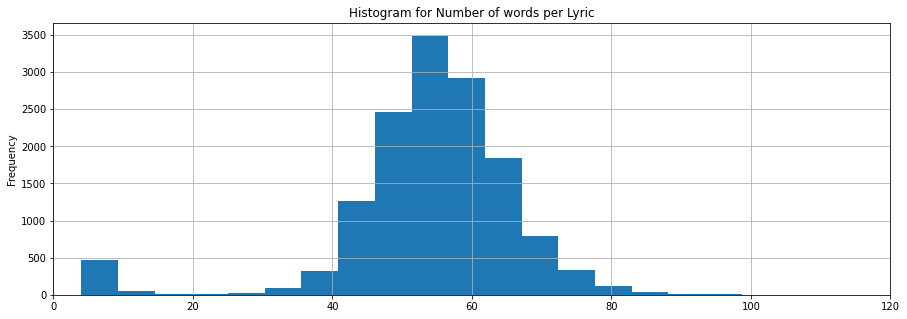

In [8]:
data['nwords'].plot.hist(figsize=[15,5], grid=True, bins=50)
plt.xlim([0,120])
plt.title('Histogram for Number of words per Lyric')
plt.ylabel('Frequency')
plt.show()

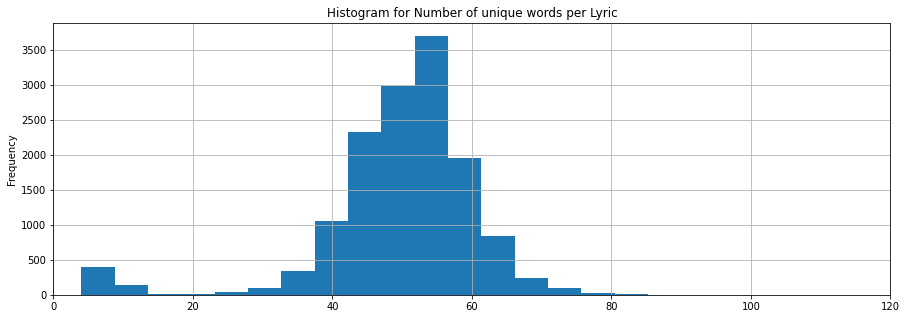

In [9]:
data['nwords_unique'].plot.hist(figsize=[15,5], grid=True, bins=50)
plt.xlim([0,120])
plt.title('Histogram for Number of unique words per Lyric')
plt.ylabel('Frequency')
plt.show()

<Figure size 1080x360 with 0 Axes>

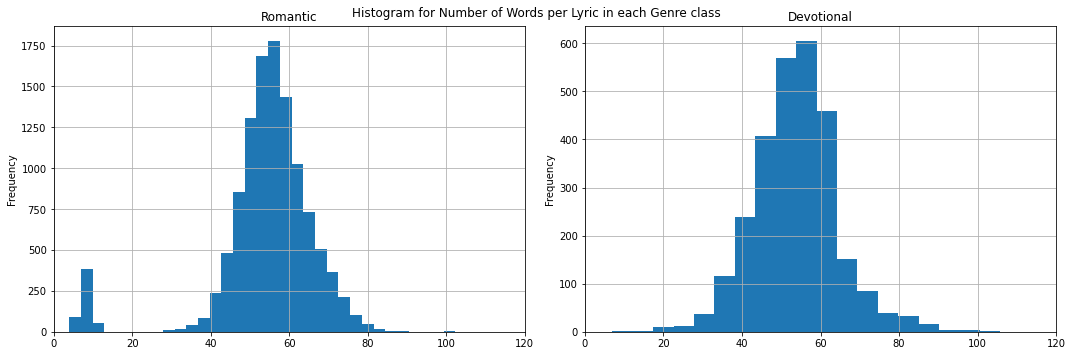

In [10]:
plt.figure(figsize=[15,5])
plt.rcParams['font.size'] = 10
plt.subplots(1,2)
plt.subplot(1,2,1)
data[data['genre']=='Romantic']['nwords'].plot.hist(figsize=[15,5], grid=True, bins=50)
plt.xlim([0,120])
plt.title('Romantic')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
data[data['genre']=='Devotional']['nwords'].plot.hist(figsize=[15,5], grid=True, bins=50)
plt.xlim([0,120])
plt.title('Devotional')
plt.ylabel('Frequency')
plt.suptitle('Histogram for Number of Words per Lyric in each Genre class')
plt.tight_layout()
plt.show()

In [11]:
data['genre'].value_counts()/data.shape[0]

Romantic      0.804161
Devotional    0.195839
Name: genre, dtype: float64

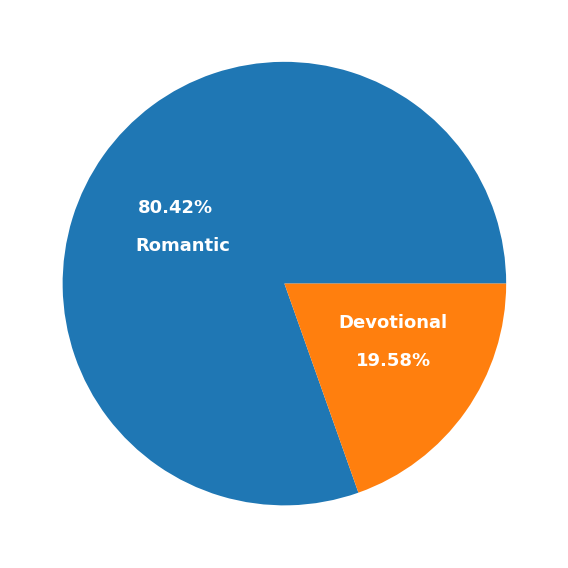

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,8])
v = data['genre'].value_counts()
plt.pie(v,autopct='%0.2f%%',labels=v.index, labeldistance=0.3, textprops={'color':'w','weight':'bold','size':18})
plt.tight_layout()
plt.show()

In [13]:
data['genre'].isna().sum()

0

<Figure size 576x576 with 0 Axes>

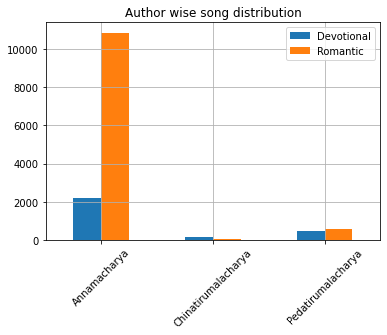

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,8])
data['author'].replace({'అన్నమాచార్య':'Annamacharya','పెదతిరుమలాచార్య':'Pedatirumalacharya','చినతిరుమలాచార్య':'Chinatirumalacharya'},inplace=True)
pd.crosstab(data['author'],data['genre']).plot.bar()
plt.xticks(rotation=45)
plt.xlabel('')
plt.legend(['Devotional','Romantic'])
plt.grid(True)
plt.title('Author wise song distribution')
plt.show()

In [15]:
all_words = dict(sorted(all_words.items(),key=lambda x:x[1],reverse=True))

In [16]:
import numpy as np
np.mean(list(all_words.values()))

3.3517637001904945

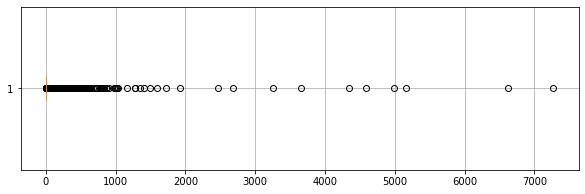

In [17]:
plt.figure(figsize=[10,3])
plt.boxplot(list(all_words.values()),vert=False)
plt.grid(True)


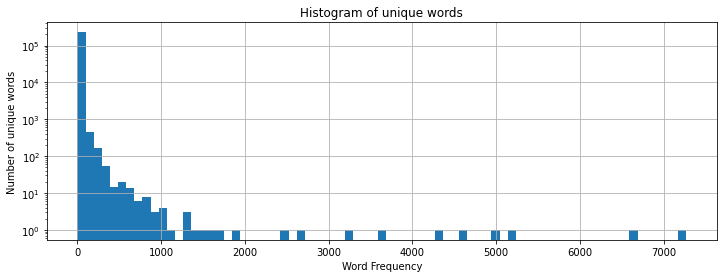

In [18]:
freq = pd.Series(' '.join(data['Lyric']).split()).value_counts()
plt.figure(figsize=[12,4])
plt.hist(freq, bins=75)
plt.yscale('log')
plt.ylabel('Number of unique words')
plt.xlabel('Word Frequency')
plt.title('Histogram of unique words')
plt.grid(True)
plt.show()

# Audio Data EDA

In [19]:
adata = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')

In [20]:
adata.shape

(1233, 9)

In [21]:
adata['Ragam'].value_counts()

లలిత               98
సాళంగనాట           94
సామంతం             89
బౌళి               70
శంకరాభరణం          68
                   ..
భల్లాటి             1
మనోహరి              1
ప్రతాపనాట           1
శ్రీరాగం-ఏకతాళి     1
బైరవి               1
Name: Ragam, Length: 71, dtype: int64

In [22]:
!pip install torchaudio -q

In [23]:
import torchaudio
import os

In [24]:
AUD_PATH = '/content/drive/MyDrive/Annamayya/'

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(adata['Ragam'])
adata['RagamCode'] = adata.apply(lambda x: le.transform([x['Ragam']])[0], axis=1)

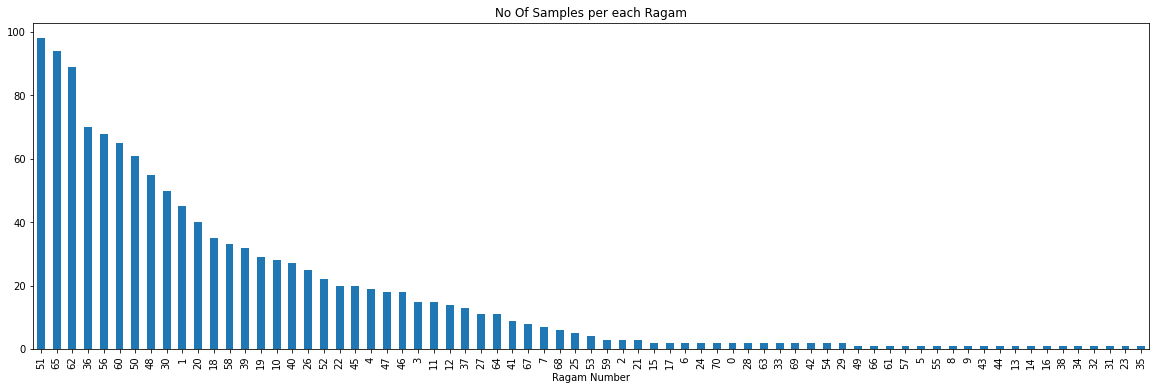

In [26]:
plt.figure(figsize=[20,6])
adata['RagamCode'].value_counts().plot.bar()
plt.title('No Of Samples per each Ragam')
plt.xlabel('Ragam Number')
plt.show()

In [27]:
def get_props(aud_file):
  if os.path.exists(aud_file):
    y,fs = torchaudio.load(aud_file)
    duration = y.shape[1]/fs # Seconds
    ch = y.shape[0]
    return duration, fs, ch
  else:
    return 0, 0, 0

In [53]:
#adata['aud_props'] = adata.apply(lambda x:get_props(os.path.join(AUD_PATH, x['MP3 File'])),axis=1)
adata = pd.read_pickle('/content/drive/MyDrive/song_map_w_metadata.json')

In [54]:
adata['RagamCode'].value_counts()

51    98
65    94
62    89
36    70
56    68
60    65
50    61
48    55
30    49
1     45
20    40
18    35
58    33
39    32
19    29
10    28
40    27
26    25
52    22
22    20
45    20
4     19
47    18
46    18
11    15
3     15
12    14
37    13
27    11
64    11
Name: RagamCode, dtype: int64

In [55]:
all_samples = adata.Ragam.value_counts().index
low_samples = all_samples[adata.Ragam.value_counts()<10]
# Drop these rows.
for s in low_samples:
  adata = adata[adata.Ragam!=s]

In [56]:
adata['duration'] = adata.apply(lambda x:x['aud_props'][0],axis=1)
adata['fs'] = adata.apply(lambda x:x['aud_props'][1], axis=1)
adata['ch'] = adata.apply(lambda x:x['aud_props'][2], axis=1)

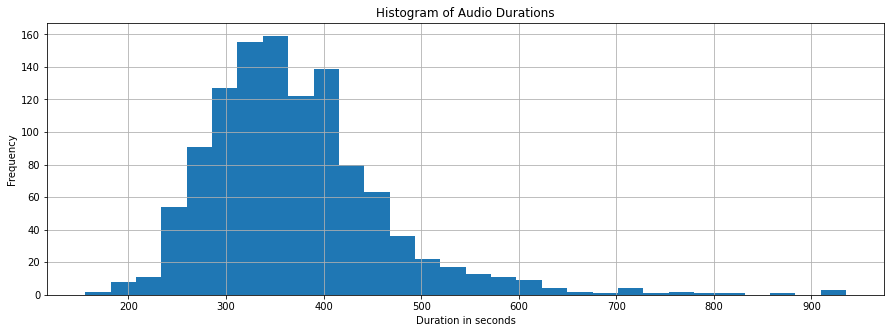

In [57]:
plt.figure(figsize=[15,5])
adata['duration'].plot.hist(bins=30)
plt.grid(True)
plt.xlabel('Duration in seconds')
plt.title('Histogram of Audio Durations')
plt.show()

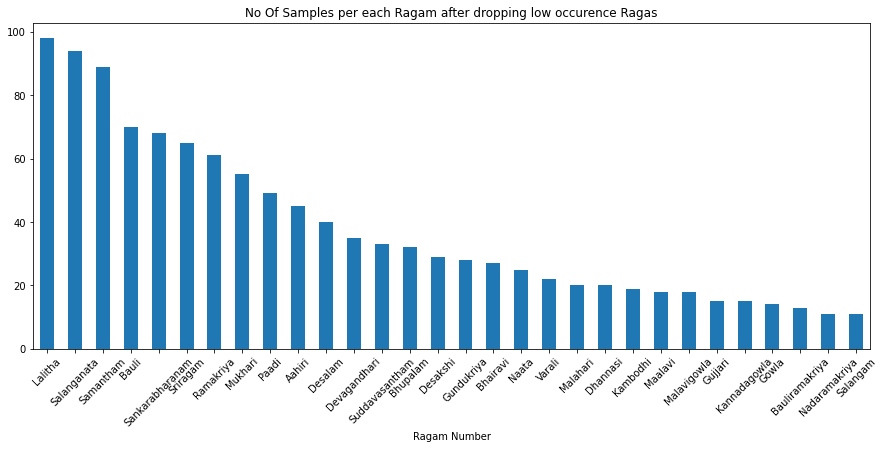

In [58]:
plt.figure(figsize=[15,6])
adata['Ragam'].value_counts().plot.bar()
plt.title('No Of Samples per each Ragam after dropping low occurence Ragas')
plt.xticks(rotation=45)
plt.xlabel('Ragam Number')
plt.show()

In [59]:
ragam_te_to_en = {
    'సామంతం' : 'Samantham',
    'దేసాళం' : 'Desalam',
    'రామక్రియ' : 'Ramakriya',
    'కన్నడగౌళ' : 'Kannadagowla',
    'శంకరాభరణం' : 'Sankarabharanam',
    'దేవగాంధారి' : 'Devagandhari',
    'ఆహిరి' : 'Aahiri',
    'ముఖారి' : 'Mukhari',
    'నాట' : 'Naata',
    'శుద్ధవసంతం' : 'Suddavasantham',
    'సాళంగనాట' : 'Salanganata',
    'లలిత' : 'Lalitha',
    'భూపాలం' : 'Bhupalam',
    'ధన్నాసి' : 'Dhannasi',
    'కాంబోది' : 'Kambodhi',
    'బౌళి' : 'Bauli',
    'గుండుక్రియ' : 'Gundukriya',
    'శ్రీరాగం' : 'Sriragam',
    'భైరవి' : 'Bhairavi',
    'పాడి' : 'Paadi',
    'మాళవి' : 'Maalavi',
    'నాదరామక్రియ' : 'Nadaramakriya',
    'మలహరి' : 'Malahari',
    'వరాళి' : 'Varali',
    'గౌళ' : 'Gowla',
    'సాళంగం' : 'Salangam',
    'బౌళిరామక్రియ' : 'Bauliramakriya',
    'మాళవిగౌళ' : 'Malavigowla',
    'గుజ్జరి' : 'Gujjari',
    'దేసాక్షి' : 'Desakshi'
}
adata['Ragam'].replace(ragam_te_to_en,inplace=True)

In [60]:
adata['ch'].value_counts()

2    1139
Name: ch, dtype: int64

In [61]:
adata = adata[adata['duration']>0]

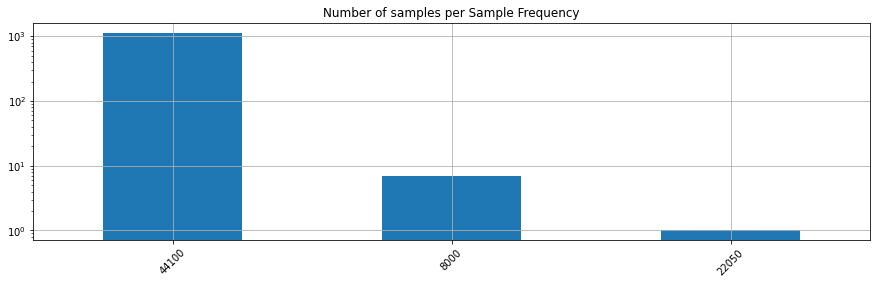

In [62]:
plt.figure(figsize=[15,4])
adata['fs'].value_counts().plot.bar()
plt.grid()
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Number of samples per Sample Frequency')
plt.show()

In [63]:
pd.DataFrame(adata['fs'].value_counts())

,fs
44100,1131
8000,7
22050,1


In [ ]:
#adata.to_pickle('/content/drive/MyDrive/song_map_w_metadata.json')

In [64]:
pd.DataFrame(adata['Ragam'].value_counts(),columns=['Ragam'])

,Ragam
Lalitha,98
Salanganata,94
Samantham,89
Bauli,70
Sankarabharanam,68
Sriragam,65
Ramakriya,61
Mukhari,55
Paadi,49
Aahiri,45


# Text similarity between genres

In [27]:
dev_lyrics = list(data[data['genre']=='Devotional'].apply(lambda x:x['Lyric'],axis=1))
rom_lyrics = list(data[data['genre']=='Romantic'].apply(lambda x:x['Lyric'],axis=1))

In [31]:
from functools import reduce
dev_combined = [reduce((lambda x,y:f'{x} {y}'),dev_lyrics)]
rom_combined = [reduce((lambda x,y:f'{x} {y}'),rom_lyrics)]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics.pairwise import linear_kernel, pairwise_distances

In [37]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dev_combined + rom_combined)

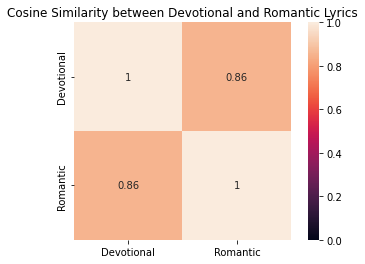

In [84]:
import seaborn as sns
ticks = ['Devotional','Romantic']
m = linear_kernel(tfidf_matrix)
sns.heatmap(m,vmin=0,vmax=1,annot=True,
            xticklabels=ticks,yticklabels=ticks,square=True)
plt.title('Cosine Similarity between Devotional and Romantic Lyrics')
plt.show()

# Raga wise lyrical similarity

In [66]:
adata['Ragam'].unique()

array(['Samantham', 'Desalam', 'Ramakriya', 'Kannadagowla',
       'Sankarabharanam', 'Devagandhari', 'Aahiri', 'Mukhari', 'Naata',
       'Suddavasantham', 'Salanganata', 'Lalitha', 'Bhupalam', 'Dhannasi',
       'Kambodhi', 'Bauli', 'Gundukriya', 'Sriragam', 'Bhairavi', 'Paadi',
       'Maalavi', 'Nadaramakriya', 'Malahari', 'Varali', 'Gowla',
       'Salangam', 'Bauliramakriya', 'Malavigowla', 'Gujjari', 'Desakshi'],
      dtype=object)

In [68]:
raga_wise_lyrics = {x:list(adata[adata['Ragam']==x].apply(lambda x:x['Lyric'],axis=1)) for x in adata['Ragam'].unique()}

In [69]:
raga_wise_reduced = {z:reduce((lambda x,y:f'{x} {y}'),raga_wise_lyrics[z]) for z in raga_wise_lyrics}

In [71]:
tfidf_vectorizer_r = TfidfVectorizer()
ovll = []
for k in raga_wise_reduced:
  ovll = ovll + [raga_wise_reduced[k]]
tfidf_matrix_r = tfidf_vectorizer_r.fit_transform(ovll)

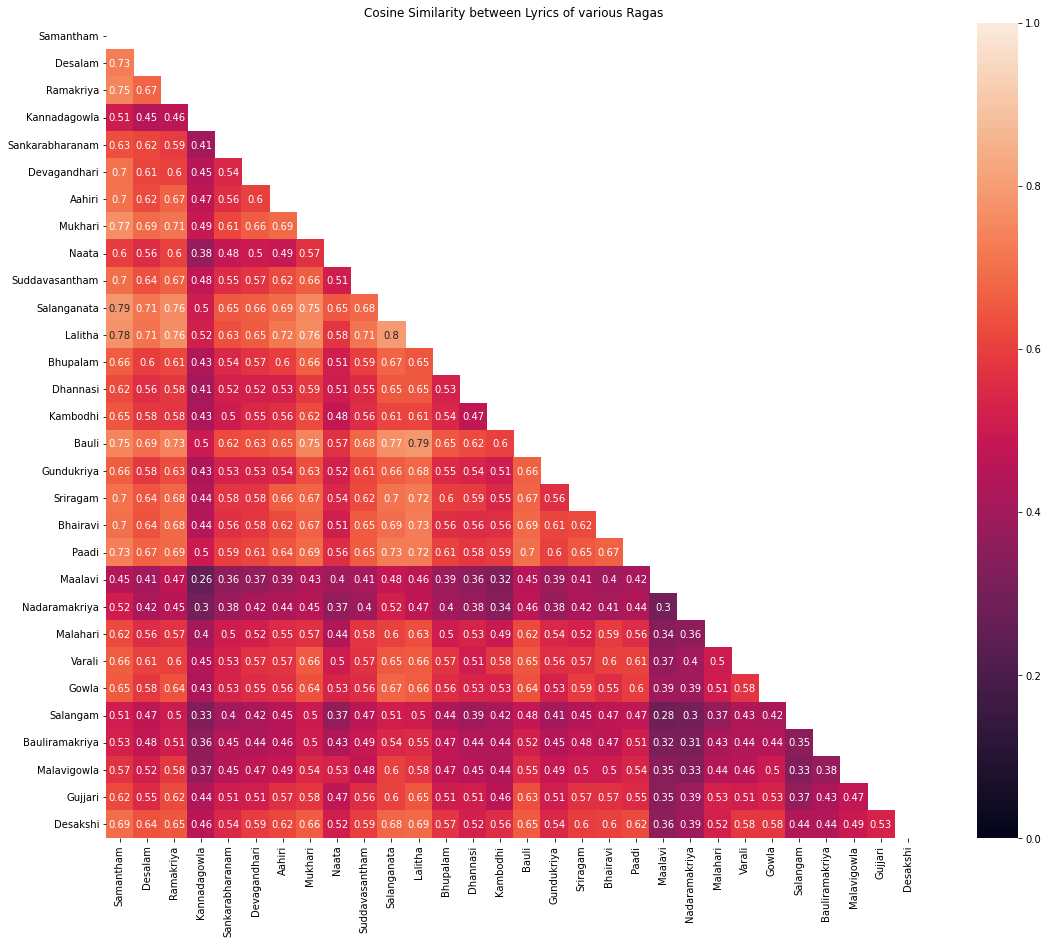

In [87]:
ticks = list(raga_wise_reduced.keys())
plt.figure(figsize=[20,15])
m = linear_kernel(tfidf_matrix_r)
sns.heatmap(m,vmin=0,vmax=1,annot=True,
            xticklabels=ticks,yticklabels=ticks,square=True, mask=np.triu(m))
plt.title('Cosine Similarity between Lyrics of various Ragas')
plt.show()

In [111]:
from IPython.display import display, HTML

In [115]:
pd.set_option("display.precision", 3)
display(HTML(pd.DataFrame({ticks[x]:np.mean(list(m[x,0:x]) + list(m[x,x+1:])) for x in range(30)},index=['Mean Similarity']).T.sort_values(by=['Mean Similarity'],ascending=True).to_html()))

,Mean Similarity
Maalavi,0.382
Nadaramakriya,0.398
Salangam,0.423
Kannadagowla,0.430
Bauliramakriya,0.450
Malavigowla,0.479
Naata,0.506
Malahari,0.514
Gujjari,0.520
Kambodhi,0.522


# On Full Data

In [116]:
raga_wise_lyrics_f = {x:list(data[data['Ragam']==x].apply(lambda x:x['Lyric'],axis=1)) for x in data['Ragam'].unique()}

In [117]:
raga_wise_reduced_f = {z:reduce((lambda x,y:f'{x} {y}'),raga_wise_lyrics_f[z]) for z in raga_wise_lyrics_f}

In [118]:
tfidf_vectorizer_rf = TfidfVectorizer()
ovll = []
for k in raga_wise_reduced_f:
  ovll = ovll + [raga_wise_reduced_f[k]]
tfidf_matrix_rf = tfidf_vectorizer_rf.fit_transform(ovll)

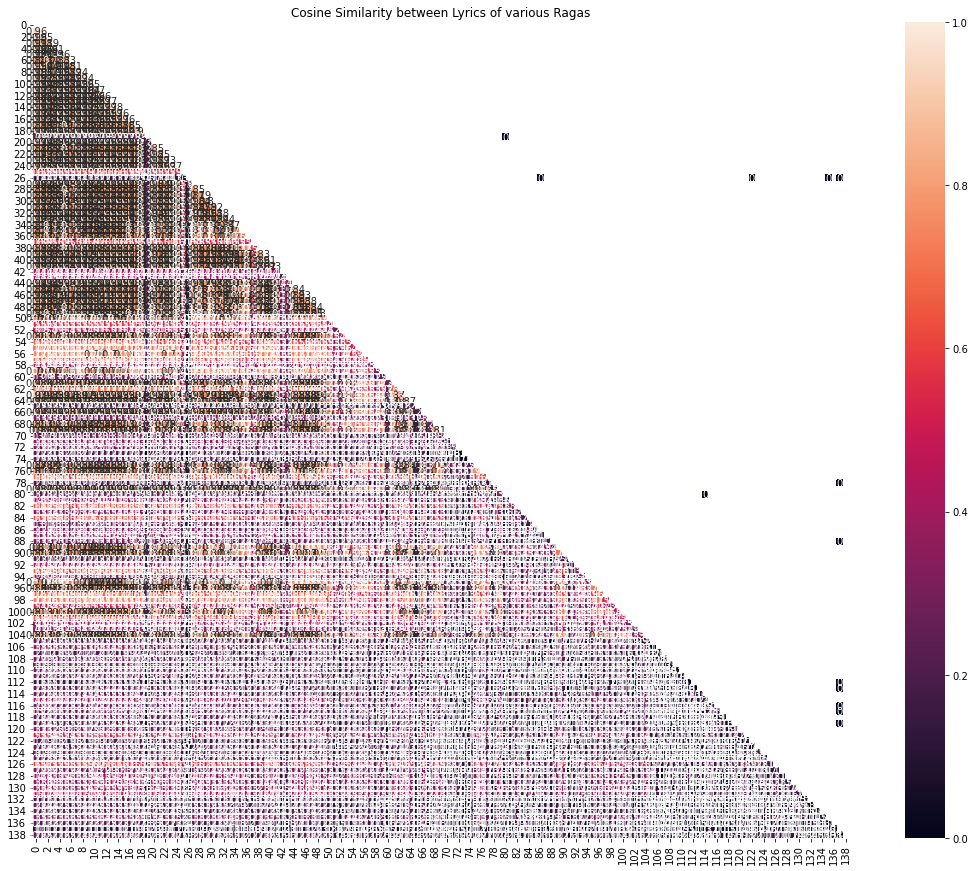

In [120]:
ticks = list(raga_wise_reduced_f.keys())
plt.figure(figsize=[20,15])
m = linear_kernel(tfidf_matrix_rf)
sns.heatmap(m,vmin=0,vmax=1,annot=True,square=True, mask=np.triu(m))
plt.title('Cosine Similarity between Lyrics of various Ragas')
plt.show()

In [122]:
pd.set_option("display.precision", 3)
display(HTML(pd.DataFrame({ticks[x]:np.mean(list(m[x,0:x]) + list(m[x,x+1:])) for x in range(len(ticks))},index=['Lyric Similarity with other Ragas']).T.sort_values(by=['Lyric Similarity with other Ragas'],ascending=True).to_html()))

,Lyric Similarity with other Ragas
దేశిసూళాది,0.076
గీతం - నాట,0.082
మలరి,0.106
చెంచుమలహరి,0.112
దేసివి,0.126
దేసాక్షి-ఏకతాళి,0.128
రాగం,0.131
నారణి దేశాక్షి,0.133
మనోహరం,0.142
శుద్ధకేశి,0.143
